#### IMPORTANDO BIBLIOTECAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#### CARREGANDO DADOS

In [8]:
df_dados = pd.read_csv('dados.csv')

df_dados = df_dados.sample(frac=1)

# df_dados['x3'] = df_dados['x1'] ** 3

df_dados

,x1,x2,target
1418,0.057597,0.790068,C2
556,0.571775,0.699960,C2
543,0.617403,0.784832,C2
676,0.521306,0.775207,C2
573,0.686954,0.577089,C2
...,...,...,...
170,0.135752,0.400101,C1
1669,0.294912,0.363312,C1
315,0.225804,0.317460,C1
1556,0.424604,0.832687,C2


#### VISUALIZANDO DADOS

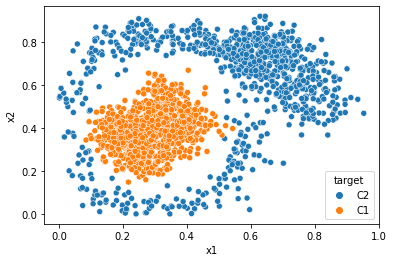

In [9]:
sns.scatterplot(data=df_dados, x="x1", y="x2", hue="target")
plt.show()

#### PREPARANDO DADOS

In [10]:
target = df_dados['target'].array

df_features = df_dados.drop(columns=['target'])

X = df_features.values

y = target

#### TREINANDO E VALIDANDO O MODELO

In [11]:
def getModel():
    # return LogisticRegression()
    # return RandomForestClassifier()
    return KNeighborsClassifier()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

modelo = getModel().fit(X_train,y_train)

score = modelo.score(X_test, y_test)

print('acurácia =', score)

acurácia = 0.9944903581267218


#### VALIDANDO DE FORMA MAIS ELABORADA (VALIDAÇÃO CRUZADA)

In [13]:
scores = cross_val_score(getModel(),X,y,cv=10)

print('acurácia cv = ',np.mean(scores))

acurácia cv =  0.9966972254265073


#### VISUALIZANDO A MATRIZ DE CONFUSÃO

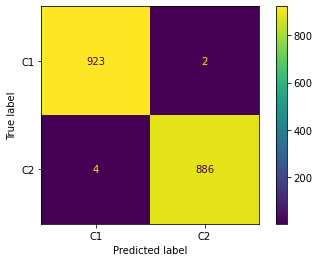

In [14]:
y_pred = cross_val_predict(getModel(),X,y,cv=10)

cm = confusion_matrix(y,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = modelo.classes_)

disp.plot()

plt.show()